# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Mochamad Phillia Wibowo
- Email: boyphilli4@gmail.com
- Id Dicoding: A012YBF393

## Persiapan

### Menyiapkan library yang dibutuhkan

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
import joblib

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data=pd.read_csv('/content/drive/MyDrive/employee_data.csv')
data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


### Menyiapkan data yang akan diguankan

## Data Understanding

In [47]:
data.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [49]:
data.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [50]:
data.duplicated().sum()
print("Jumlah duplikat data:", data.duplicated().sum())

Jumlah duplikat data: 0


In [51]:
data['Attrition'].value_counts()

,count
Attrition,
0.0,879
1.0,179


# Visualisasi antara Attrition dengan Gender

<function matplotlib.pyplot.show(close=None, block=None)>

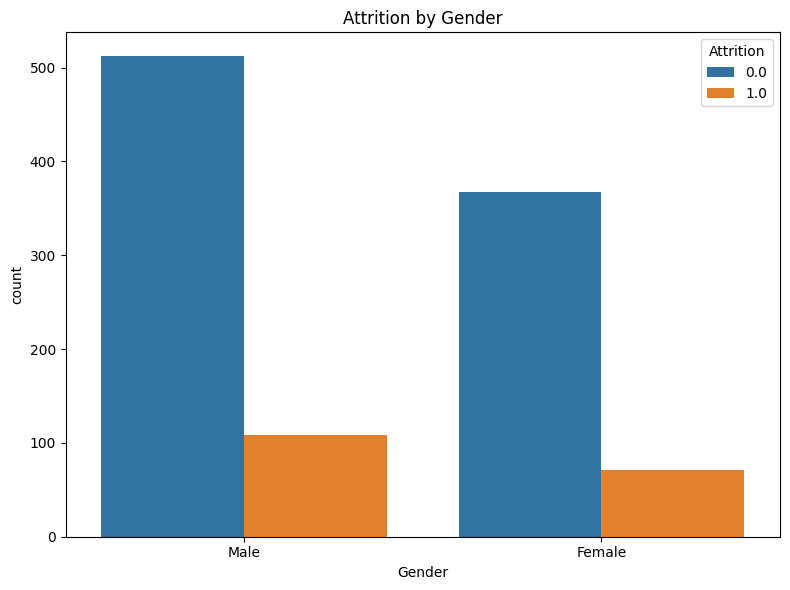

In [52]:
plt.figure(figsize=((8,6)))
sns.countplot(data=data,x='Gender',hue='Attrition')
plt.title('Attrition by Gender')
plt.tight_layout()
plt.show

# Visualisasi Tingkat Kepuasan di Perusahaan

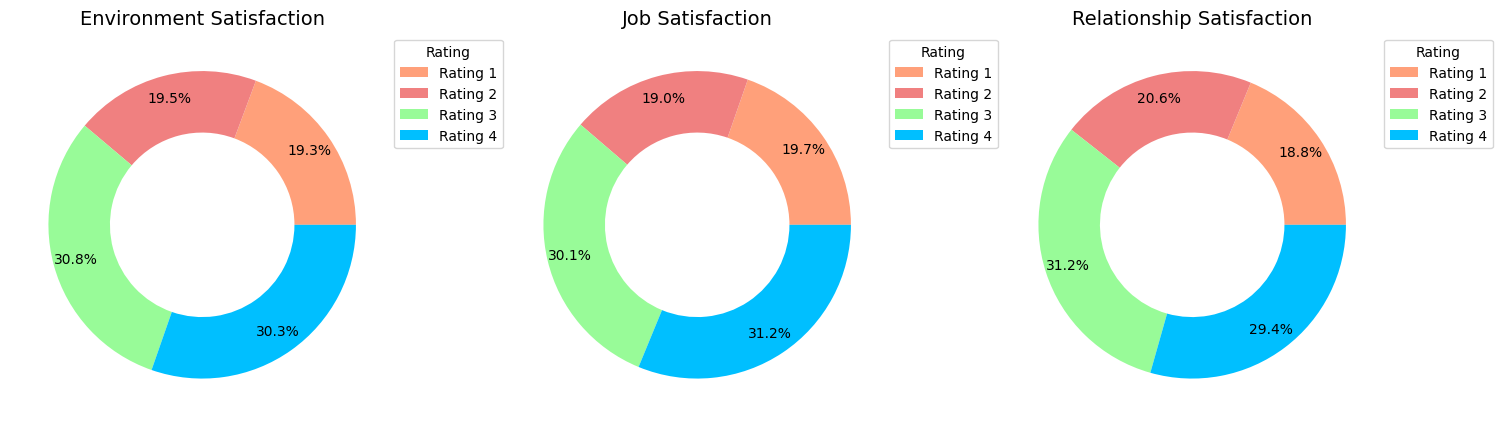

In [53]:
def split(text):
  return re.sub(r'(?<!^)(?=[A-Z])', ' ', text)

emp_sat=['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']
color_map={
    1:'LightSalmon',
    2:'LightCoral',
    3:'PaleGreen',
    4:'DeepSkyBlue',
}
fig, ax=plt.subplots(1, len(emp_sat), figsize=(15,8))
for i, column in enumerate(emp_sat):
  counts=data[column].value_counts().sort_index()
  values=counts.values
  labels=counts.index
  colors=[color_map[rating] for rating in labels]

  wedges, texts, autotexts=ax[i].pie(
      values,
      labels=None,
      autopct='%1.1f%%',
      colors=colors,
      wedgeprops={'width':0.4},
      textprops={'fontsize':10},
      pctdistance=0.85
  )

  ax[i].set_title(split(column), fontsize=14)

  ax[i].legend(wedges, [f'Rating {k}' for k in labels],
                 title="Rating", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


# Perbandingan Kategori Usia di Perusahaan

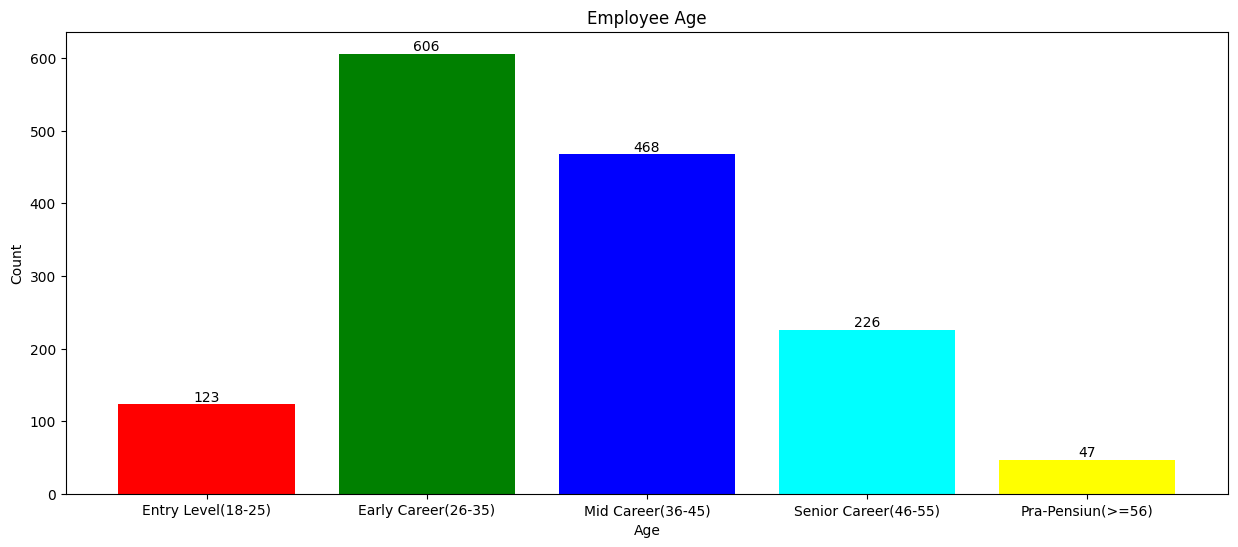

In [54]:
age_18_25=data.Age[(data.Age >=18) & (data.Age <=25)]
age_26_35=data.Age[(data.Age >=26) & (data.Age <=35)]
age_36_45=data.Age[(data.Age >=36) & (data.Age <= 45)]
age_46_55=data.Age[(data.Age >=46) & (data.Age <=55)]
age_56_60=data.Age[(data.Age >=56)]

x=["Entry Level(18-25)","Early Career(26-35)","Mid Career(36-45)","Senior Career(46-55)", "Pra-Pensiun(>=56)"]
y=[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_56_60.values)]

plt.figure(figsize=(15,6))
plt.bar(x, y, color=['red', 'green','blue', 'cyan', 'yellow'])
plt.title('Employee Age')
plt.xlabel('Age')
plt.ylabel('Count')

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

# Perbandingan Attrition Terhadap Departement dan Job Role

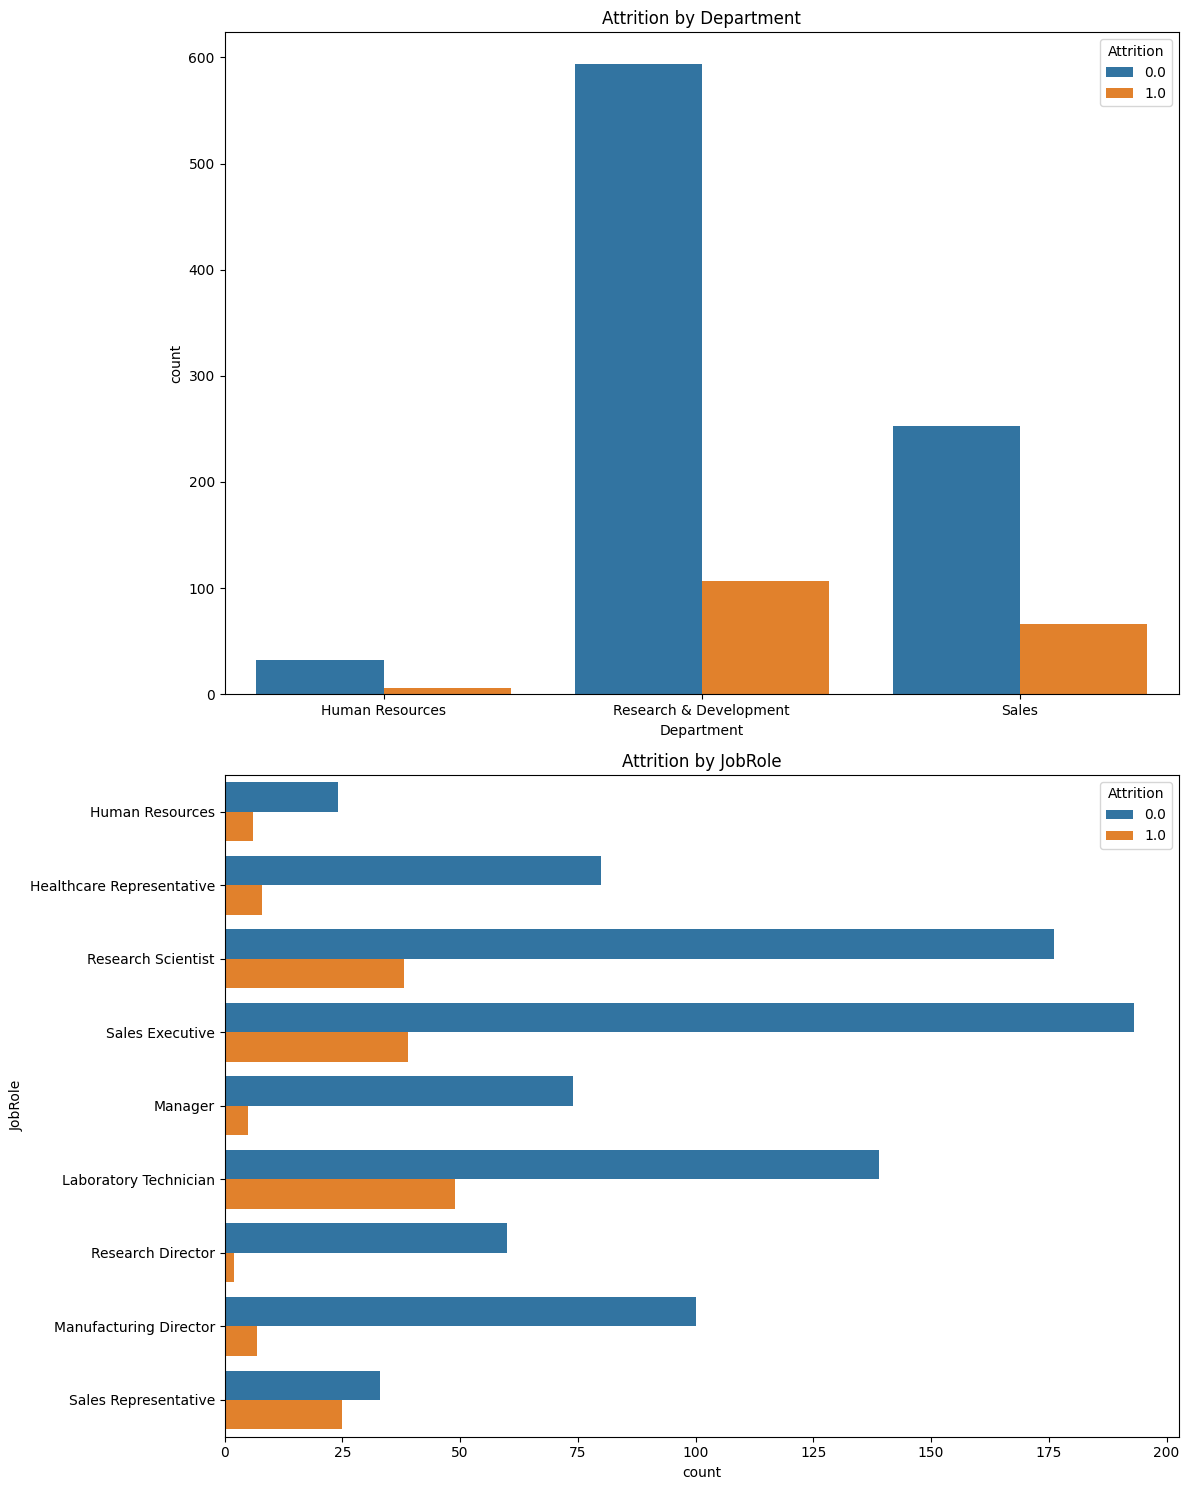

In [55]:
job=['Department','JobRole']
fig, axs=plt.subplots(len(job), 1, figsize=(12,15))
axs=axs.flatten()

for i, feature in enumerate(job):
  if feature=='JobRole':
    sns.countplot(data=data, y=feature, hue='Attrition', ax=axs[i])
  else:
    sns.countplot(data=data, x=feature, hue='Attrition', ax=axs[i])
  axs[i].set_title(f"Attrition by {feature}")
plt.tight_layout()
plt.show()

# Visualisasi kondisi pekerjaan setiap Employee

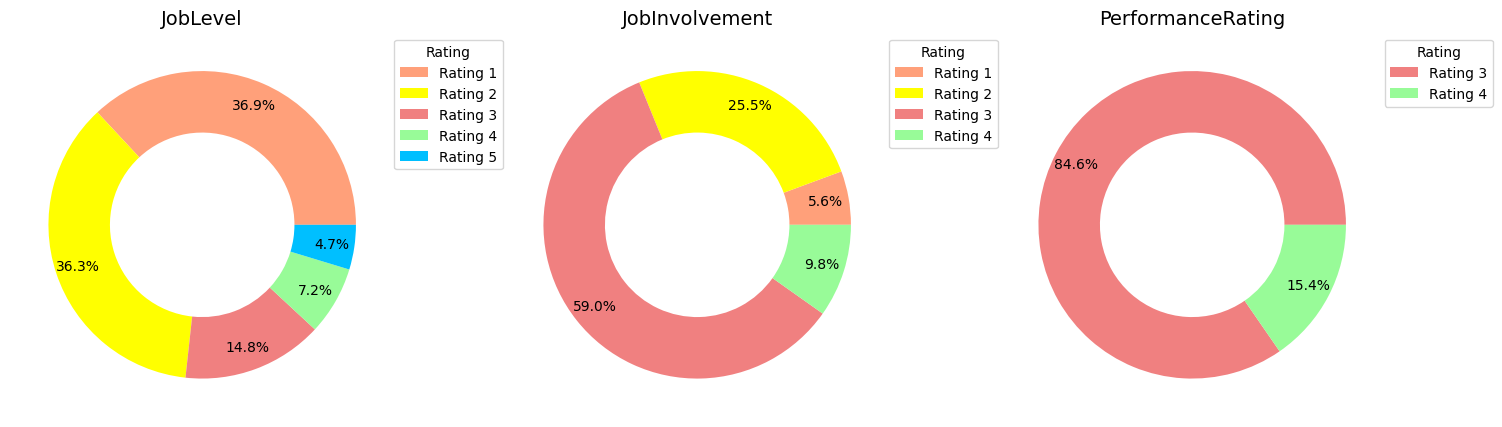

In [56]:
import matplotlib.pyplot as plt

job = ['JobLevel', 'JobInvolvement', 'PerformanceRating']
color_map = {
    1: 'LightSalmon',
    2: 'yellow',
    3: 'LightCoral',
    4: 'PaleGreen',
    5: 'DeepSkyBlue'
}

fig, ax = plt.subplots(1, len(job), figsize=(15, 8))

for i, column in enumerate(job):
    counts = data[column].value_counts().sort_index()
    labels = counts.index.tolist()  # pastikan sesuai isi tiap kolom
    values = counts.values
    colors = [color_map[rating] for rating in labels]

    wedges, texts, autotexts = ax[i].pie(
        values,
        labels=None,
        autopct='%1.1f%%',
        colors=colors,
        wedgeprops={'width': 0.4},
        textprops={'fontsize': 10},
        pctdistance=0.85
    )

    ax[i].set_title(column, fontsize=14)
    ax[i].legend(wedges, [f'Rating {k}' for k in labels],
                 title="Rating", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


# Visualisasi Overtime By Attrition  

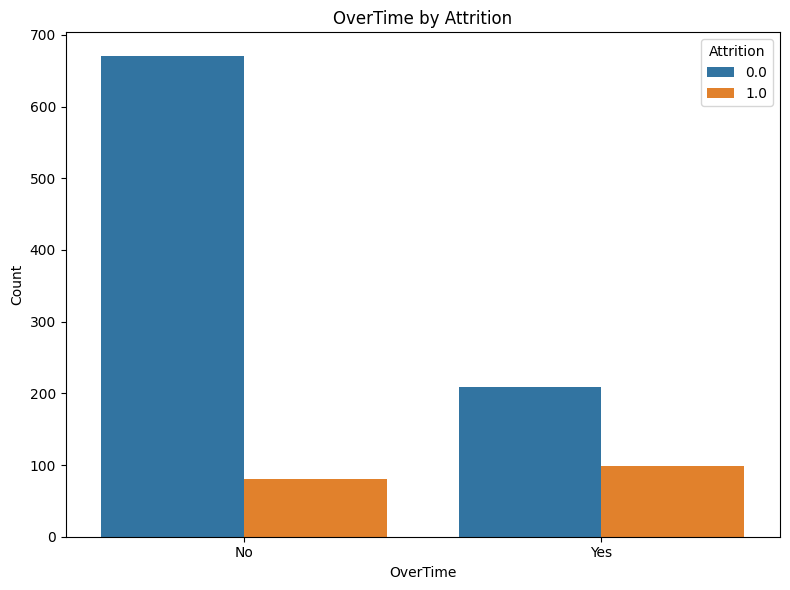

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='OverTime', hue='Attrition')
plt.title('OverTime by Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [57]:
data=data.drop(columns=['Over18','EmployeeCount','StandardHours','EmployeeId'])

In [58]:
data_testing = data[data.isna().any(axis=1)]

In [59]:
data_testing=data_testing.drop(columns='Attrition')

In [60]:
data=data.dropna()

In [61]:
data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [62]:
data_clean=data.copy()

In [63]:
le=LabelEncoder()
for col in data_clean.select_dtypes(include=['object']).columns:
  data_clean[col]=le.fit_transform(data_clean[col])

In [64]:
X=data_clean.drop('Attrition',axis=1)
y=data_clean['Attrition']
smote=SMOTE(random_state=42)
X_over,y_over=smote.fit_resample(X,y)

## Modeling

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X_over,y_over, test_size=0.2, random_state=42)
print(f"Training set shape: X_train{X_train.shape}, y_train:{y_train.shape}")
print(f"Testing set shape: X_test:{X_test.shape}, y_test:{y_test.shape}")

Training set shape: X_train(1406, 30), y_train:(1406,)
Testing set shape: X_test:(352, 30), y_test:(352,)


In [66]:
dt=DecisionTreeClassifier().fit(X_train, y_train)
rf=RandomForestClassifier().fit(X_train, y_train)
svm=SVC().fit(X_train, y_train)
LR=LogisticRegression(max_iter=10000).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

In [67]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Logistic Regression': evaluate_model(LR, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })


summary_df = pd.DataFrame(rows)

summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (DT),0.798295,0.798601,0.798295,0.798287
1,Random Forest (RF),0.914773,0.914815,0.914773,0.914764
2,Support Vector Machine (SVM),0.579545,0.594501,0.579545,0.565215
3,Logistic Regression,0.815341,0.815757,0.815341,0.815226


# Melakukan Feature Selection

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size=0.2,  random_state=42)
model=LinearRegression()
rfe_selector=RFE(model,n_features_to_select=10 )
X_train_rfe=rfe_selector.fit_transform(X_train,y_train)
X_test_rfe=rfe_selector.transform(X_test)
print("Fitur yang dipilih :",rfe_selector.get_support(indices=True))
selected_features = X.columns[rfe_selector.get_support(indices=True)]
print("Nama fitur yang dipilih:", selected_features.tolist())

Fitur yang dipilih : [ 7  8 10 11 13 18 20 21 22 25]
Nama fitur yang dipilih: ['EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [69]:
X_select=X_over[['EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']]
X_train1, X_test1, y_train1, y_test1=train_test_split(X_select, y_over,test_size=0.2, random_state=42 )
print(f"Training set shape: X_train{X_train1.shape}, y_train:{y_train1.shape}")
print(f"Testing set shape: X_test:{X_test1.shape}, y_test:{y_test1.shape}")

Training set shape: X_train(1406, 10), y_train:(1406,)
Testing set shape: X_test:(352, 10), y_test:(352,)


In [70]:
dt1=DecisionTreeClassifier().fit(X_train1, y_train1)
rf1=RandomForestClassifier().fit(X_train1, y_train1)
svm1=SVC().fit(X_train1, y_train1)
LR1=LogisticRegression(max_iter=10000).fit(X_train1, y_train1)

In [72]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

results = {
    'Decision Tree (DT) After feature selection': evaluate_model(dt1, X_test1, y_test1),
    'Random Forest (RF) After feature selection': evaluate_model(rf1, X_test1, y_test1),
    'Support Vector Machine (SVM) After feature selection ': evaluate_model(svm1, X_test1, y_test1),
    'Logistic Regression': evaluate_model(dt1, X_test1, y_test1)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })


summary_df = pd.DataFrame(rows)

summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (DT) After feature selection,0.823864,0.825025,0.823864,0.823778
1,Random Forest (RF) After feature selection,0.872159,0.872292,0.872159,0.872162
2,Support Vector Machine (SVM) After feature sel...,0.846591,0.847230,0.846591,0.846472
3,Logistic Regression,0.823864,0.825025,0.823864,0.823778


# Melakukan Pengujian

In [73]:
data.to_csv('Employee_clean.csv',index=False)

In [74]:
data_testing.to_csv('Data_pred.csv', index=False)

In [75]:
joblib.dump(dt, 'PrediksiModel.pkl')

['PrediksiModel.pkl']

In [76]:
!python Predict.py

In [77]:
Hasil=pd.read_csv('/content/Hasil_prediksi.csv')
Hasil[Hasil['Attrition']==1].head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
16,52,0,585,2,29,4,1,1,1,40,...,2,2,16,3,2,9,8,0,0,1.0
17,27,2,728,2,23,1,3,2,0,36,...,4,1,9,5,3,9,8,5,8,1.0
20,31,2,471,1,4,3,3,1,0,62,...,2,1,4,0,2,2,2,2,2,1.0
23,47,2,207,1,9,4,1,2,0,64,...,3,0,7,2,3,2,2,2,0,1.0
24,36,2,1120,2,11,4,2,2,0,100,...,1,1,8,2,2,6,3,0,0,1.0


In [78]:
Hasil[Hasil['Attrition']==0].head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,1,1444,0,1,4,4,4,1,88,...,2,1,7,2,3,6,2,1,2,0.0
1,40,2,1194,1,2,4,3,3,0,98,...,2,3,20,2,3,5,3,0,2,0.0
2,29,2,352,0,6,1,3,4,1,87,...,4,0,1,3,3,1,0,0,0,0.0
3,47,2,571,2,14,3,3,3,0,78,...,3,1,11,4,2,5,4,1,2,0.0
4,25,1,772,1,2,1,1,4,1,77,...,3,2,7,6,3,7,7,0,7,0.0


In [81]:
!pip freeze > requirements.txt
